## Household Vulnerability Index (HVI) Analysis 2022 (Sub-Saharan Africa)

The **Household Vulnerability Index (HVI)** is an analytical framework designed to measure and categorize the vulnerability of households based on several socio-economic and demographic factors. In this analysis, we focus on several key themes that contribute to the overall vulnerability score. These themes are derived from multiple hand picked indicators, which have been scaled, weighted and combined to produce a comprehensive vulnerability assessment for households in Sub-Saharan Africa.

### Themes and Indicators:
The HVI is constructed through the following themes:
- **Health Dimension**: These indicators reflect critical aspects of child health and access to basic hygiene and clean water, all of which are directly linked to health vulnerabilities.
- **Education Dimension**: Literacy and internet usage reflect access to education and digital resources, which are vital for improving living standards and reducing vulnerability.
- **Standards of Living Dimension**: These indicators capture the accessibility of basic infrastructure and services that enhance the quality of life and reduce environmental and health hazards.
- **Economic Dimension**: Employment rates and labor force participation highlight the economic activity and opportunities available to households, directly impacting their ability to manage vulnerabilities.

The overall vulnerability score is derived from a combination of these four themes.

### Note on Data Limitations:
<font color="red">It is important to acknowledge that this analysis may not represent a comprehensive list of factors or indicators necessary for calculating a Household Vulnerability Index. Due to the unavailability of certain data, the indicators used here were handpicked as part of a practice project. Hopefuly, future analyses will aim to incorporate a broader and more detailed dataset to improve the robustness and accuracy of the results.</font>



### Methodology:
To calculate the index, the scores are normalized to ensure consistency across different types of data. Each theme is then assigned a weight. These scores are then combined to create an overall vulnerability ranking, where:
- **1** represents the lowest vulnerability.
- **0** represents the highest vulnerability.



### Data Sources:
- **World Bank** (https://databank.worldbank.org/) World Development Indicators Database.

### Interpretation:
The final HVI score helps researchers or NGO's identify regions or households at higher risk of adverse outcomes due to economic disadvantages, poor living conditions or lack of access to essential services like Health and Education.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Loading the specific sheet 'Data'
df = pd.read_excel('World_Development_Indicators_Sub_Saharan_Africa_2.xlsx', sheet_name='Data')
df.head(10)

,Country Name,Indicator,Year 2022
0,Angola,Access to clean fuels and technologies for coo...,50
1,Angola,Access to electricity (% of population),48.5
2,Angola,People using at least basic sanitation service...,52.177276
3,Angola,Individuals using the Internet (% of population),39.2935
4,Angola,"Literacy rate, adult total (% of people ages 1...",72.400002
5,Angola,"Mortality rate, under-5 (per 1,000 live births)",66.9
6,Angola,People using at least basic drinking water ser...,57.719561
7,Angola,People with basic handwashing facilities inclu...,..
8,Angola,"Labor force participation rate, total (% of to...",75.357
9,Angola,"Labor force participation rate, total (% of to...",76.156


In [3]:
#Checking for the list of countries we have. The countries should be sub-saharan countries as stated in World Bank
df['Country Name'].unique()

array(['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic',
       "Cote d'Ivoire", 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Djibouti', 'Equatorial Guinea', 'Eritrea',
       'Ethiopia', 'Eswatini', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritius', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [4]:
# List of indicators
df['Indicator'].unique()

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'People using at least basic sanitation services (% of population)',
       'Individuals using the Internet (% of population)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'People using at least basic drinking water services (% of population)',
       'People with basic handwashing facilities including soap and water (% of population)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype=object)

In [5]:
df.dtypes

Country Name    object
Indicator       object
Year 2022       object
dtype: object

In [6]:
#Checking for non-numeric values in the Year 2022 column
df['Year 2022'].apply(pd.to_numeric, errors='coerce').isna().sum()

54

In [7]:
# Converting Non-numeric values to NaN
df['Year 2022'] = pd.to_numeric(df['Year 2022'], errors='coerce')
df['Year 2022'].dtype

dtype('float64')

In [8]:
# Checking for duplicates
df.duplicated().sum()

0

In [9]:
#Checking for missing values
df.isna().sum()

Country Name     0
Indicator        0
Year 2022       54
dtype: int64

In [10]:
df_pivoted = df.pivot(index='Country Name', columns='Indicator', values='Year 2022')

# Reset the index
df_pivoted = df_pivoted.reset_index()
df_pivoted

Indicator,Country Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Individuals using the Internet (% of population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Literacy rate, adult total (% of people ages 15 and above)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Angola,50.00,48.5,39.2935,75.357,76.156,72.400002,66.9,57.719561,52.177276,NaN,14.693
1,Benin,6.00,56.5,33.7602,62.399,63.038,47.099998,80.8,67.360270,19.493502,12.130464,1.473
2,Botswana,66.00,75.9,77.3272,64.600,66.847,NaN,38.7,92.567562,80.550817,NaN,23.615
3,Burkina Faso,17.20,19.5,19.9237,65.264,66.548,34.490002,78.8,49.505874,24.756494,9.156370,5.348
4,Burundi,0.10,10.3,11.2750,78.842,79.278,75.540001,50.5,62.440975,45.690685,6.303590,0.919
5,Cabo Verde,83.00,97.1,72.1021,57.516,61.514,91.000000,12.3,89.870725,83.045303,NaN,12.272
6,Cameroon,29.40,71.0,43.8629,71.862,72.463,NaN,69.8,69.592553,43.119165,36.711834,3.687
7,Central African Republic,1.00,15.7,NaN,70.453,70.484,NaN,96.8,36.295044,13.846294,22.176414,6.337
8,Chad,9.50,11.7,12.1839,60.220,60.232,27.280001,102.9,51.995153,12.922066,26.200473,1.104
9,Comoros,9.60,89.9,NaN,44.120,45.395,61.709999,48.2,NaN,NaN,NaN,5.854


In [11]:
df_pivoted.shape

(48, 12)

In [12]:
# % of missing values from each column
df_pivoted.isna().mean()*100

Indicator
Country Name                                                                                        0.000000
Access to clean fuels and technologies for cooking (% of population)                                0.000000
Access to electricity (% of population)                                                             0.000000
Individuals using the Internet (% of population)                                                    6.250000
Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)       2.083333
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)     2.083333
Literacy rate, adult total (% of people ages 15 and above)                                         47.916667
Mortality rate, under-5 (per 1,000 live births)                                                     0.000000
People using at least basic drinking water services (% of population)                               8.333333
People us

## Approach to Handle Missing Data

**1. Low and Moderate Missingness:**
Imputation Strategy: For indicators with missing values below 20%, missing data will be imputed using the KNN Imputer to leverage relationships between other variables in the dataset.

**2.High Missingness:**
The column "Adult literacy rate" has nearly half of its data missing, which could reduce the reliability of the overall index. A decision has been made to exclude this indicator from the index calculation to maintain data integrity.

In [13]:
# Dropping columns
df_pivoted = df_pivoted.drop(columns=['Literacy rate, adult total (% of people ages 15 and above)'])
df_pivoted.sample(10)

Indicator,Country Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Individuals using the Internet (% of population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
46,Zambia,9.0,47.8,31.2342,59.682,59.964,55.6,68.247807,36.301369,18.154615,5.993
21,Guinea,1.1,47.7,33.9230,52.673,53.489,96.0,71.451212,31.270742,20.636095,5.328
30,Mauritius,99.0,100.0,75.5000,55.180,64.163,15.0,100.000000,NaN,NaN,6.322
26,Madagascar,1.5,36.1,20.5777,85.151,86.407,65.8,53.465883,14.754285,23.435631,3.186
35,Rwanda,8.3,50.6,34.4405,60.162,62.133,38.0,65.100878,73.826445,18.402008,15.085
12,Cote d'Ivoire,42.6,70.4,38.4133,64.375,65.786,69.4,72.850926,36.962084,21.814959,2.434
23,Kenya,30.0,76.0,40.8137,73.664,74.071,41.1,62.861778,36.528720,37.599238,5.805
5,Cabo Verde,83.0,97.1,72.1021,57.516,61.514,12.3,89.870725,83.045303,NaN,12.272
34,Nigeria,25.6,60.5,35.4563,58.961,59.053,107.2,79.639409,46.570675,31.078829,3.827
25,Liberia,0.8,31.8,30.1275,76.660,77.582,73.2,75.610132,22.523382,3.440189,2.990


In [14]:
df_pivoted.shape

(48, 11)

In [16]:
df_pivoted.columns

Index(['Country Name',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Individuals using the Internet (% of population)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'People with basic handwashing facilities including soap and water (% of population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype='object', name='Indicator')

In [17]:
columns_to_impute = ('Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Individuals using the Internet (% of population)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'People with basic handwashing facilities including soap and water (% of population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)')

In [18]:
# Impute null values using the Kmeans
imputer = KNNImputer(n_neighbors=5)

# We need the numeric columns only
df_numeric = df_pivoted[['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Individuals using the Internet (% of population)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'People with basic handwashing facilities including soap and water (% of population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)']]
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=columns_to_impute)
df_imputed.head(10)

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Individuals using the Internet (% of population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,50.0,48.5,39.29350,75.357,76.156,66.9,57.719561,52.177276,28.830807,14.693
1,6.0,56.5,33.76020,62.399,63.038,80.8,67.360270,19.493502,12.130464,1.473
2,66.0,75.9,77.32720,64.600,66.847,38.7,92.567562,80.550817,24.404459,23.615
3,17.2,19.5,19.92370,65.264,66.548,78.8,49.505874,24.756494,9.156370,5.348
4,0.1,10.3,11.27500,78.842,79.278,50.5,62.440975,45.690685,6.303590,0.919
5,83.0,97.1,72.10210,57.516,61.514,12.3,89.870725,83.045303,34.901659,12.272
6,29.4,71.0,43.86290,71.862,72.463,69.8,69.592553,43.119165,36.711834,3.687
7,1.0,15.7,17.68506,70.453,70.484,96.8,36.295044,13.846294,22.176414,6.337
8,9.5,11.7,12.18390,60.220,60.232,102.9,51.995153,12.922066,26.200473,1.104
9,9.6,89.9,60.60290,44.120,45.395,48.2,79.279067,48.369081,30.454794,5.854


In [19]:
df_imputed.isnull().mean()*100

Access to clean fuels and technologies for cooking (% of population)                               0.0
Access to electricity (% of population)                                                            0.0
Individuals using the Internet (% of population)                                                   0.0
Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)      0.0
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)    0.0
Mortality rate, under-5 (per 1,000 live births)                                                    0.0
People using at least basic drinking water services (% of population)                              0.0
People using at least basic sanitation services (% of population)                                  0.0
People with basic handwashing facilities including soap and water (% of population)                0.0
Unemployment, total (% of total labor force) (modeled ILO estimate)      

### Data Normalization and Min-Max Scaling
To ensure consistency and comparability across variables with different scales, **normalization** was applied. Specifically, the **Min-Max Scaler** will be used to rescale each feature to a range between 0 and 1. This method was chosen because:
- It preserves the relationships between values while eliminating the influence of varying scales.
- It maintains the interpretability of variables within the defined range, making the results intuitive.

By normalizing the data, we avoid biases caused by features with larger ranges dominating the analysis, ensuring a fair contribution of all variables to subsequent computations.

### Principal Component Analysis (PCA) for Weight Determination
**PCA** was employed to determine the weights for each variable in the construction of the index. This approach provides:
- A data-driven method for reducing dimensionality while retaining the most critical variance in the dataset.
- The ability to assign weights based on the explained variance, ensuring that variables contributing more to the data structure are appropriately emphasized.

By extracting the principal components, we ensure that the index reflects the underlying structure of the data, with higher weights assigned to variables that contribute significantly to the observed variance.

In [20]:
scaler = MinMaxScaler()

# Apply normalization to the indicator columns
columns_to_impute_1 = df_imputed.columns
df_imputed[columns_to_impute_1] = scaler.fit_transform(df_imputed[columns_to_impute_1])
df_imputed[columns_to_impute_1]

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Individuals using the Internet (% of population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,0.5000,0.437773,0.371645,0.815597,0.806428,0.520000,0.348363,0.472527,0.464879,0.379115
1,0.0600,0.525109,0.298250,0.571622,0.558717,0.652381,0.496948,0.112032,0.159111,0.024692
2,0.6600,0.736900,0.876135,0.613063,0.630644,0.251429,0.885449,0.785480,0.383836,0.618311
3,0.1720,0.121179,0.114719,0.625565,0.624998,0.633333,0.221772,0.170082,0.104658,0.128579
4,0.0010,0.020742,0.000000,0.881213,0.865381,0.363810,0.421131,0.400981,0.052426,0.009839
5,0.8300,0.968341,0.806828,0.479684,0.529939,0.000000,0.843885,0.812994,0.576030,0.314209
6,0.2940,0.683406,0.432255,0.749793,0.736692,0.547619,0.531353,0.372618,0.609173,0.084048
7,0.0100,0.079694,0.085025,0.723264,0.699322,0.804762,0.018163,0.049745,0.343043,0.155094
8,0.0950,0.036026,0.012056,0.530596,0.505731,0.862857,0.260137,0.039551,0.416720,0.014799
9,0.0960,0.889738,0.654299,0.227463,0.225560,0.341905,0.680644,0.430523,0.494612,0.142145


In [21]:
df_imputed.columns

Index(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Individuals using the Internet (% of population)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'People with basic handwashing facilities including soap and water (% of population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)'],
      dtype='object')

In [22]:
# oops! Forgot to add the country column back but no worries
df_imputed['Country Name'] = df_pivoted['Country Name']

# Move it to the first position
columns = ['Country Name'] + [col for col in df_imputed.columns if col != 'Country Name']
df_imputed = df_imputed[columns]
df_imputed.sample(8)

,Country Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Individuals using the Internet (% of population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People with basic handwashing facilities including soap and water (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
32,Namibia,0.474,0.521834,0.675683,0.510807,0.509017,0.243810,0.782874,0.292336,0.499892,0.514638
13,Djibouti,0.103,0.617904,0.713051,0.000000,0.000000,0.377143,0.632682,0.634972,0.498738,0.692091
10,"Congo, Dem. Rep.",0.043,0.143013,0.211764,0.635017,0.619616,0.602857,0.000000,0.075424,0.291339,0.108123
12,Cote d'Ivoire,0.426,0.676856,0.359970,0.608827,0.610609,0.543810,0.581572,0.304707,0.336425,0.050456
40,Somalia,0.048,0.442140,0.216540,0.037317,0.028098,0.893333,0.356685,0.344565,0.396528,0.498016
9,Comoros,0.096,0.889738,0.654299,0.227463,0.225560,0.341905,0.680644,0.430523,0.494612,0.142145
5,Cabo Verde,0.830,0.968341,0.806828,0.479684,0.529939,0.000000,0.843885,0.812994,0.576030,0.314209
43,Sudan,0.656,0.598253,0.231190,0.311361,0.308930,0.374286,0.459339,0.407016,0.134066,0.187078


In [23]:
# Apply Prinicipal Component Analysis to the normalized data
pca = PCA(n_components=10)  # We use 10 components as we have 10 different indicators.
pca.fit(df_imputed[['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Individuals using the Internet (% of population)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'People with basic handwashing facilities including soap and water (% of population)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)']])

# Extract PCA weights (explained variance ratio)
weights_pca = pca.explained_variance_ratio_

# Display PCA weights
print("PCA Weights:", weights_pca)

PCA Weights: [5.83545614e-01 1.47687174e-01 7.85150925e-02 5.65803374e-02
 4.89151419e-02 3.34796441e-02 2.64314516e-02 1.55647234e-02
 9.00348301e-03 2.77338162e-04]


In [24]:
# Create a Household Vulnerability Index column 
df_imputed['HVI'] = (weights_pca[0] * df_imputed['Access to clean fuels and technologies for cooking (% of population)'] +
                    weights_pca[1] * df_imputed['Access to electricity (% of population)'] +
                    weights_pca[2] * df_imputed['Individuals using the Internet (% of population)'] +
                    weights_pca[3] * df_imputed['Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)'] +
                    weights_pca[4] * df_imputed['Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)'] +
                    weights_pca[5] * df_imputed['Mortality rate, under-5 (per 1,000 live births)'] +
                    weights_pca[6] * df_imputed['People using at least basic drinking water services (% of population)'] +
                    weights_pca[7] * df_imputed['People using at least basic sanitation services (% of population)'] +
                    weights_pca[8] * df_imputed['People with basic handwashing facilities including soap and water (% of population)'] +
                    weights_pca[9] * df_imputed['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
df_imputed['HVI']

0     0.509462
1     0.233814
2     0.675970
3     0.223931
4     0.125864
5     0.783998
6     0.428576
7     0.130740
8     0.156599
9     0.303330
10    0.153089
11    0.428026
12    0.482496
13    0.251262
14    0.370179
15    0.271581
16    0.531702
17    0.249433
18    0.806675
19    0.242745
20    0.480025
21    0.181986
22    0.155725
23    0.427506
24    0.454660
25    0.188525
26    0.197377
27    0.139561
28    0.225509
29    0.443135
30    0.888979
31    0.212309
32    0.498569
33    0.182642
34    0.370270
35    0.231108
36    0.261728
37    0.412364
38    0.906988
39    0.147891
40    0.162204
41    0.812137
42    0.108717
43    0.554306
44    0.260479
45    0.182472
46    0.225167
47    0.369138
Name: HVI, dtype: float64

### Visualization

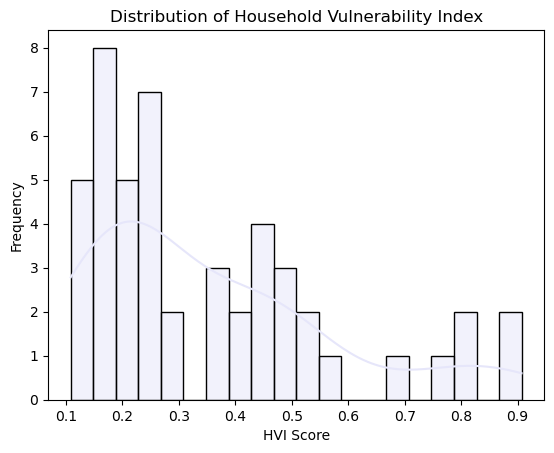

In [30]:
# HVI distribution
sns.histplot(df_imputed['HVI'], bins=20, kde=True, color='lavender')
plt.title('Distribution of Household Vulnerability Index')
plt.xlabel('HVI Score')
plt.ylabel('Frequency')
plt.show()

## Characteristics:
The left-skewed distribution indicates that most households fall into the highly vulnerable category, as the majority of the scores are concentrated toward the lower end of the scale.
A smaller portion of households has lower vulnerability (scores closer to 0.9).

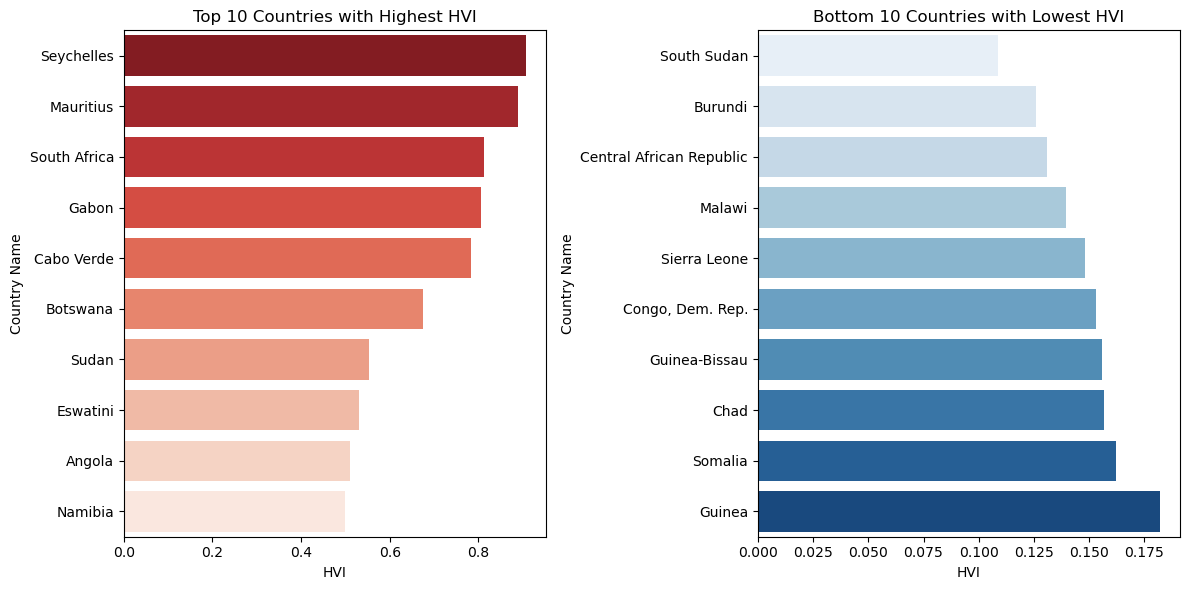

In [31]:
# Sort data by HVI
top_10 = df_imputed.nlargest(10, 'HVI')
bottom_10 = df_imputed.nsmallest(10, 'HVI')

# Bar chart for Top 10 and Bottom 10
plt.figure(figsize=(12, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(data=top_10, x='HVI', y='Country Name', palette='Reds_r')
plt.title('Top 10 Countries with Highest HVI')
plt.xlabel('HVI')

# Bottom 10
plt.subplot(1, 2, 2)
sns.barplot(data=bottom_10, x='HVI', y='Country Name', palette='Blues')
plt.title('Bottom 10 Countries with Lowest HVI')
plt.xlabel('HVI')

plt.tight_layout()
plt.show()

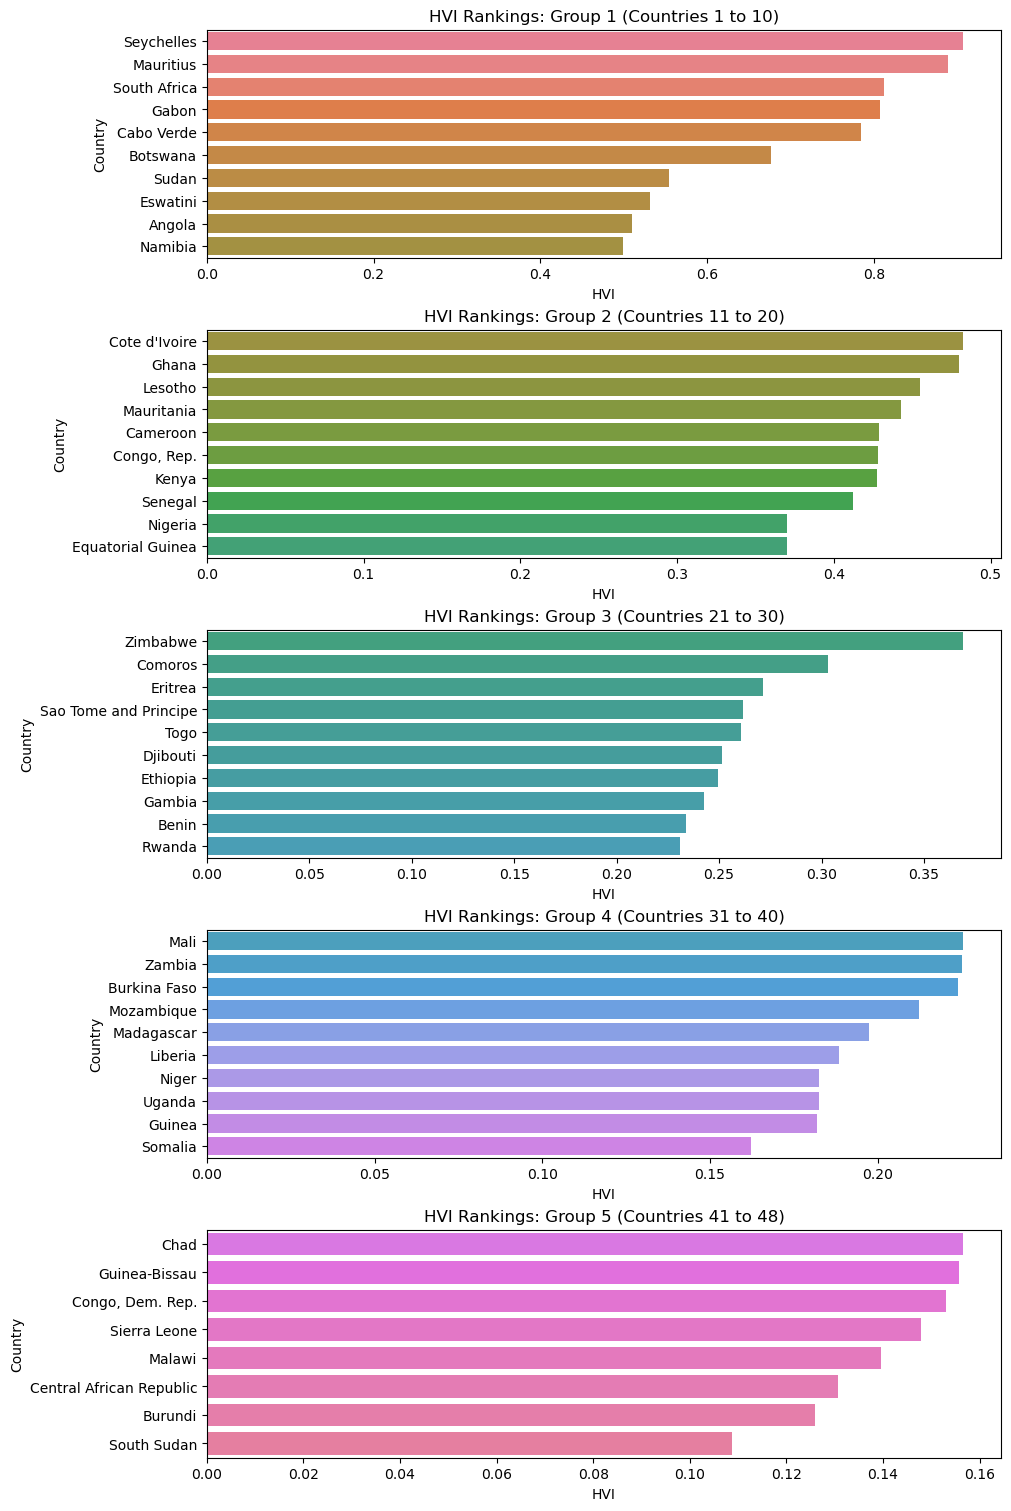

In [32]:
# Sort data by HVI values
data = df_imputed.sort_values(by="HVI", ascending=False).reset_index(drop=True)

# Split into groups of 10
group_size = 10
groups = [data.iloc[i:i+group_size] for i in range(0, len(data), group_size)]

# Define the color palette
palette = sns.color_palette("husl", len(data))

# Create subplots
fig, axes = plt.subplots(nrows=len(groups), ncols=1, figsize=(10, 15), constrained_layout=True)

# Plot each group
for i, group in enumerate(groups):
    ax = axes[i] if len(groups) > 1 else axes  # Handle single subplot
    sns.barplot(
        x="HVI",
        y="Country Name",
        data=group,
        ax=ax,
        palette=palette[group.index[0]:group.index[-1]+1]
    )
    ax.set_title(f"HVI Rankings: Group {i + 1} (Countries {group.index[0] + 1} to {group.index[-1] + 1})")
    ax.set_xlabel("HVI")
    ax.set_ylabel("Country")

plt.show()

In [33]:
# Correlation matrix with HVI
correlation = df_imputed.corr()
hvi_correlation = correlation['HVI'].sort_values(ascending=False)

print("Correlation of Indicators with HVI:")
print(hvi_correlation)

Correlation of Indicators with HVI:
HVI                                                                                                1.000000
Access to clean fuels and technologies for cooking (% of population)                               0.982835
Individuals using the Internet (% of population)                                                   0.804303
Access to electricity (% of population)                                                            0.798770
People using at least basic sanitation services (% of population)                                  0.728928
People using at least basic drinking water services (% of population)                              0.709482
Unemployment, total (% of total labor force) (modeled ILO estimate)                                0.502903
People with basic handwashing facilities including soap and water (% of population)                0.344874
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)   -0

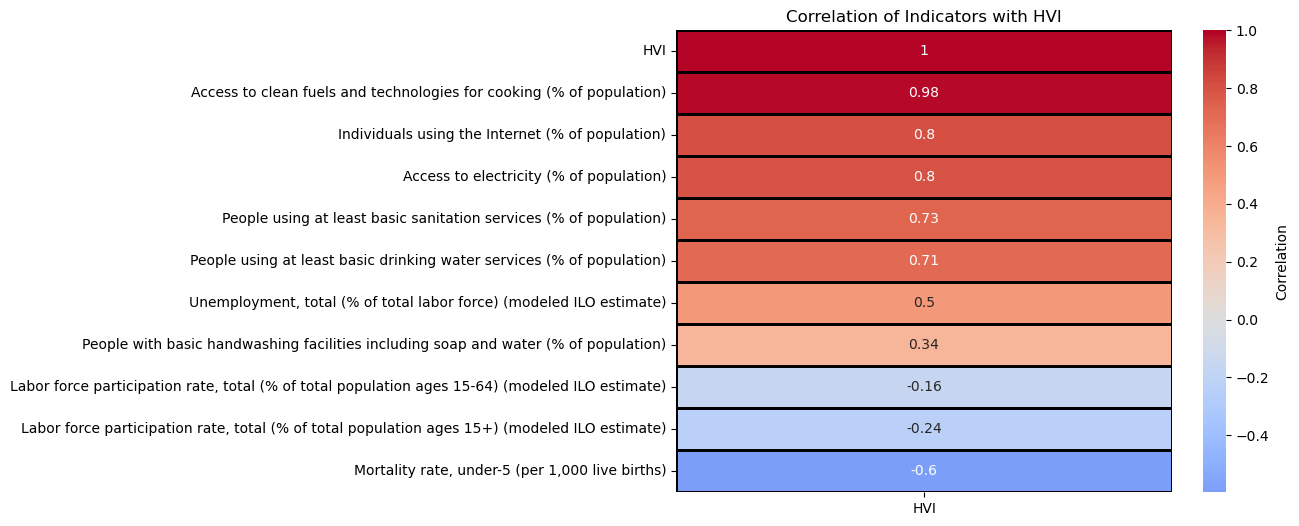

In [34]:
# Create a DataFrame of just the correlation values with HVI
hvi_corr_df = hvi_correlation.to_frame()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    hvi_corr_df,
    annot=True,
    cmap='coolwarm', 
    center=0,  
    cbar_kws={'label': 'Correlation'},
    linewidths=1,
    linecolor='black'
)
plt.title("Correlation of Indicators with HVI")
plt.show()

## Conclusion:
**Strong positive correlations** are observed with indicators of access to basic services (clean fuels, internet, electricity, water, sanitation). These services are likely linked to lower vulnerability.
**Moderate correlations** with employment-related indicators (unemployment rate) highlight the importance of economic participation in reducing vulnerability.
**Negative correlations** with labor force participation and child mortality reinforce that higher workforce participation and lower child mortality are factors associated with reduced vulnerability.

## Feature Importance

In [35]:
# Define features (X) and target (y)
X = df_imputed.drop(columns=['HVI', 'Country Name'])
y = df_imputed['HVI']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Feature importance
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

print("Feature Importance from Linear Regression:")
print(feature_importance)

Feature Importance from Linear Regression:
Access to clean fuels and technologies for cooking (% of population)                               0.583546
Access to electricity (% of population)                                                            0.147687
Individuals using the Internet (% of population)                                                   0.078515
Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)      0.056580
Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)    0.048915
Mortality rate, under-5 (per 1,000 live births)                                                    0.033480
People using at least basic drinking water services (% of population)                              0.026431
People using at least basic sanitation services (% of population)                                  0.015565
People with basic handwashing facilities including soap and water (% of population)          

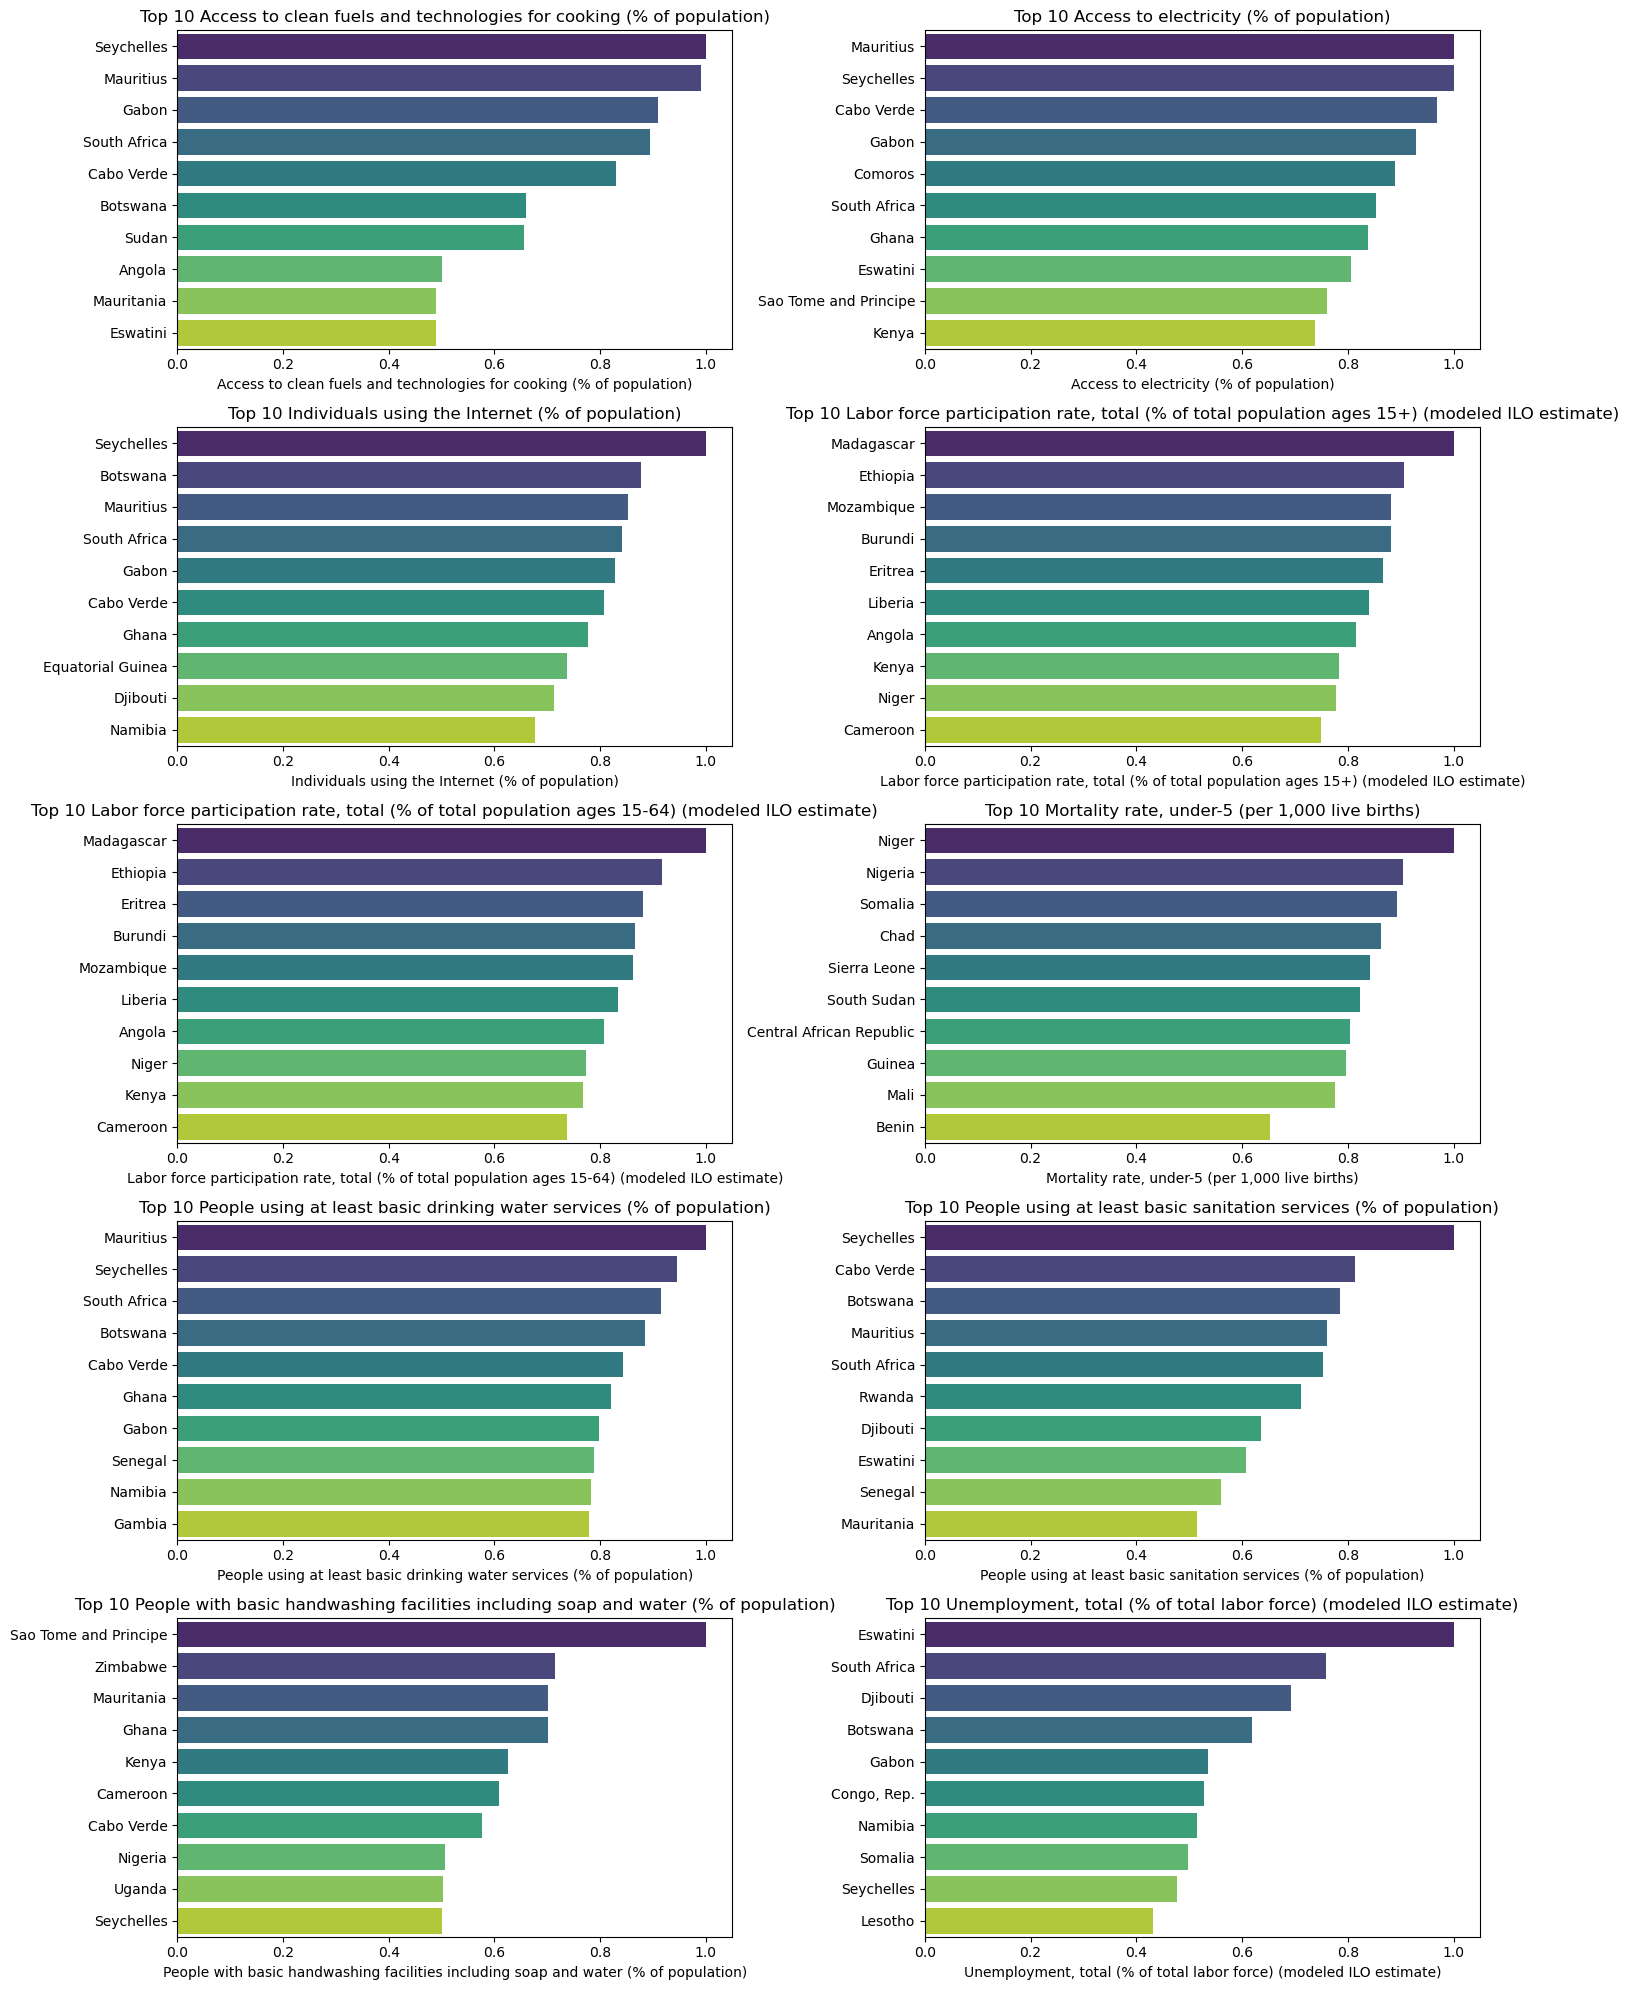

In [36]:
# Create subplots (10 indicators)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten axes for easy access
axes = axes.flatten()

# Loop over each indicator
for i, indicator in enumerate(columns_to_impute_1):
    # Sort values of the indicator, and select the top and bottom 10 countries
    sorted_data = df_imputed[['Country Name', indicator]].sort_values(by=indicator, ascending=False)
    top_10 = sorted_data.head(10)
    bottom_10 = sorted_data.tail(10)

    # Combine top 10 and bottom 10 for the bar plot
    #plot_data = pd.concat([top_10, bottom_10])
    
    # Plot
    sns.barplot(x=indicator, y='Country Name', data=top_10, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Top 10 {indicator}')
    axes[i].set_xlabel(indicator)
    axes[i].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()